In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encode = LabelEncoder()

Q1 Housing

In [3]:
data_q1=pd.read_csv('/content/drive/MyDrive/Lab-3 ML/Housing.csv')
data_q1=data_q1.dropna()
price_1=data_q1[['price']]
area_1= data_q1[['area']]
price_1=preprocessing.normalize(price_1,axis=0)
area_1=preprocessing.normalize(area_1,axis=0)
col=data_q1.columns
data_q1=data_q1.to_numpy()
for i in range(0,len(data_q1)):
    data_q1[i][0]=price_1[i][0]
for i in range(0,len(data_q1)):
    data_q1[i][1]=area_1[i][0]
data_q1=pd.DataFrame(data_q1,columns=col)


In [4]:
def encode_data(data):
    y=data.columns
    for i in y:
        if(type(data[i][0])==type("2")):
            x=encode.fit_transform(data[i])
            data[i]=x

    return(data)
data_q1=encode_data(data_q1)
def split_data_(data,frac_training,frac_testing):
    training_data = data.sample(frac = frac_training)
    testing_data= data.drop(training_data.index)
    return(training_data,testing_data)

training_data_q1,testing_data_q1=split_data_(data_q1,0.75,0.25)

x_train_1=training_data_q1.drop(columns='price')
y_train_1=training_data_q1[['price']]
x_test_1=testing_data_q1.drop(columns='price')
y_test_1=testing_data_q1[['price']]


1) Using simple decision tree regressor

In [5]:
dtr=DTR()
dtr.fit(x_train_1,y_train_1)
pred_1=dtr.predict(x_test_1)
print(mse(pred_1,y_test_1))
print(dtr.score(x_test_1,y_test_1))

0.00014076230467295983
0.26197257762201365


2) finding max_depth from cross validation

In [6]:
dataset1_q1= data_q1.sample(frac=0.2)
t1_q1= data_q1.drop(dataset1_q1.index)

dataset2_q1= t1_q1.sample(frac=0.25)
t2_q1= t1_q1.drop(dataset2_q1.index)

dataset3_q1= t2_q1.sample(frac=1/3)
t3_q1= t2_q1.drop(dataset3_q1.index)

dataset4_q1= t3_q1.sample(frac=0.5)
dataset5_q1= t3_q1.drop(dataset4_q1.index)

In [7]:
from sklearn.metrics import r2_score
max_accu=[]

for depth_max in range(2,8):
    x_test=dataset1_q1.drop(columns='price')
    y_test=dataset1_q1[['price']]
    training_cv=data_q1.drop(dataset1_q1.index)
    x_train=training_cv.drop(columns='price')
    y_train=training_cv[['price']]
    a=[]
    dtr_1=DTR(max_depth=depth_max)
    dtr_1.fit(x_train,y_train)
    y_pred=dtr_1.predict(x_test)
    
    accu=r2_score(y_test,y_pred)
    a.append(accu)


    x_test=dataset2_q1.drop(columns='price')
    y_test=dataset2_q1[['price']]
    training_cv=data_q1.drop(dataset2_q1.index)
    x_train=training_cv.drop(columns='price')
    y_train=training_cv[['price']]
    # y_test=testing_cv['price']
    dtr_1=DTR(max_depth=depth_max)
    dtr_1.fit(x_train,y_train)
    y_pred=dtr_1.predict(x_test)
    accu=r2_score(y_test,y_pred)
    a.append(accu)

    x_test=dataset3_q1.drop(columns='price')
    y_test=dataset3_q1[['price']]
    training_cv=data_q1.drop(dataset3_q1.index)
    x_train=training_cv.drop(columns='price')
    y_train=training_cv[['price']]
    # y_test=testing_cv['price']
    dtr_1=DTR(max_depth=depth_max)
    dtr_1.fit(x_train,y_train)
    y_pred=dtr_1.predict(x_test)
    accu=r2_score(y_test,y_pred)
    a.append(accu)

    x_test=dataset4_q1.drop(columns='price')
    y_test=dataset4_q1[['price']]
    training_cv=data_q1.drop(dataset4_q1.index)
    x_train=training_cv.drop(columns='price')
    y_train=training_cv[['price']]
    # y_test=testing_cv['price']
    dtr_1=DTR(max_depth=depth_max)
    dtr_1.fit(x_train,y_train)
    y_pred=dtr_1.predict(x_test)
    accu=r2_score(y_test,y_pred)
    a.append(accu)

    x_test=dataset5_q1.drop(columns='price')
    y_test=dataset5_q1[['price']]
    training_cv=data_q1.drop(dataset5_q1.index)
    x_train=training_cv.drop(columns='price')
    y_train=training_cv[['price']]
    # y_test=testing_cv['price']
    dtr_1=DTR(max_depth=depth_max)
    dtr_1.fit(x_train,y_train)
    y_pred=dtr_1.predict(x_test)
    accu=r2_score(y_test,y_pred)
    a.append(accu)
    avg_accu=sum(a)/len(a)
    max_accu.append(avg_accu)

best_max_depth=np.argmax(max_accu)+2
print("Best max_depth is ",best_max_depth)

Best max_depth is  3


3) Visualizing result

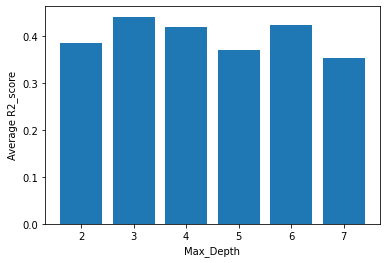

In [8]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(2,8)],max_accu)
plt.xlabel("Max_Depth")
plt.ylabel("Average R2_score")
plt.show()

4) Bagging

In [30]:
training_set_1 = training_data_q1.sample(n=350,replace=False)
x_train_1=training_set_1.drop(columns='price')
y_train_1=training_set_1[['price']]

training_set_2 = training_data_q1.sample(n=350,replace=False)
x_train_2=training_set_2.drop(columns='price')
y_train_2=training_set_2[['price']]

training_set_3 = training_data_q1.sample(n=350,replace=False)
x_train_3=training_set_3.drop(columns='price')
y_train_3=training_set_3[['price']]

training_set_4 = training_data_q1.sample(n=350,replace=False)
x_train_4=training_set_4.drop(columns='price')
y_train_4=training_set_4[['price']]

training_set_5 = training_data_q1.sample(n=350,replace=False)
x_train_5=training_set_5.drop(columns='price')
y_train_5=training_set_5[['price']]

training_set_6 = training_data_q1.sample(n=350,replace=False)
x_train_6=training_set_6.drop(columns='price')
y_train_6=training_set_6[['price']]

training_set_7 = training_data_q1.sample(n=350,replace=False)
x_train_7=training_set_7.drop(columns='price')
y_train_7=training_set_7[['price']]

training_set_8 = training_data_q1.sample(n=350,replace=False)
x_train_8=training_set_8.drop(columns='price')
y_train_8=training_set_8[['price']]

training_set_9 = training_data_q1.sample(n=350,replace=False)
x_train_9=training_set_9.drop(columns='price')
y_train_9=training_set_9[['price']]

training_set_10 = training_data_q1.sample(n=350,replace=False)
x_train_10=training_set_10.drop(columns='price')
y_train_10=training_set_10[['price']]

5) training dtr on training sets

In [31]:
dtr_1=DTR()
dtr_1.fit(x_train_1,y_train_1)

dtr_2=DTR()
dtr_2.fit(x_train_2,y_train_2)

dtr_3=DTR()
dtr_3.fit(x_train_3,y_train_3)

dtr_4=DTR()
dtr_4.fit(x_train_4,y_train_4)

dtr_5=DTR()
dtr_5.fit(x_train_5,y_train_5)

dtr_6=DTR()
dtr_6.fit(x_train_6,y_train_6)

dtr_7=DTR()
dtr_7.fit(x_train_7,y_train_7)

dtr_8=DTR()
dtr_8.fit(x_train_8,y_train_8)

dtr_9=DTR()
dtr_9.fit(x_train_9,y_train_9)

dtr_10=DTR()
dtr_10.fit(x_train_10,y_train_10)

DecisionTreeRegressor()

6)

Performance of each decision tree regressor is  [0.20058511337633322, 0.1859650695189825, 0.33607609338972333, 0.36072844753880706, 0.0029023526645590714, 0.2658404539787369, 0.2819012039475425, 0.22053129267973393, 0.29930948710232386, 0.23332026013131024]
Average r2_score of decision tree regressor is  0.2387159774328053


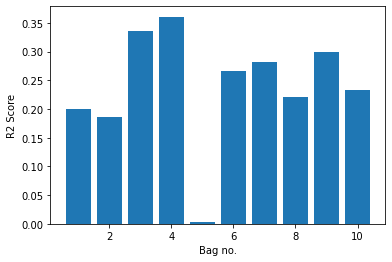

In [32]:
from sklearn.metrics import r2_score

predict_1=dtr_1.predict(x_test_1)
predict_2=dtr_2.predict(x_test_1)
predict_3=dtr_3.predict(x_test_1)
predict_4=dtr_4.predict(x_test_1)
predict_5=dtr_5.predict(x_test_1)
predict_6=dtr_6.predict(x_test_1)
predict_7=dtr_7.predict(x_test_1)
predict_8=dtr_8.predict(x_test_1)
predict_9=dtr_9.predict(x_test_1)
predict_10=dtr_10.predict(x_test_1)

score=[]
score.append(r2_score(y_test_1,predict_1))
score.append(r2_score(y_test_1,predict_2))
score.append(r2_score(y_test_1,predict_3))
score.append(r2_score(y_test_1,predict_4))
score.append(r2_score(y_test_1,predict_5))
score.append(r2_score(y_test_1,predict_6))
score.append(r2_score(y_test_1,predict_7))
score.append(r2_score(y_test_1,predict_8))
score.append(r2_score(y_test_1,predict_9))
score.append(r2_score(y_test_1,predict_10))
print("Performance of each decision tree regressor is ",score)
print("Average r2_score of decision tree regressor is ",sum(score)/10)

plt.bar([i for i in range(1,11)],score)
plt.xlabel("Bag no.")
plt.ylabel("R2 Score")
plt.show()

9)

In [12]:
from sklearn.ensemble import RandomForestRegressor 
rfr_reg = RandomForestRegressor(n_estimators=100)
rfr_reg.fit(x_train_1,y_train_1.values.ravel())
pred_rfr=rfr_reg.predict(x_test_1)
print("Mean Sqaure Error of RandomForestRegressor is",mse(y_test_1,pred_rfr))
print("Mean Absolute Error of RandomForestRegressor is",mae(y_test_1,pred_rfr))

Mean Sqaure Error of RandomForestRegressor is 7.394424750702336e-05
Mean Absolute Error of RandomForestRegressor is 0.006217108089079731


10)

In [13]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=100)
ada_reg.fit(x_train_1, y_train_1.values.ravel())
pred_ada=ada_reg.predict(x_test_1)
print("Mean Sqaure Error of AdaBoostRegressor is",mse(y_test_1,pred_ada))
print("Mean Absolute Error of AdaBoostRegressor is",mae(y_test_1,pred_ada))

Mean Sqaure Error of AdaBoostRegressor is 9.147698500037634e-05
Mean Absolute Error of AdaBoostRegressor is 0.007524917144172328


Q2 Breast Cancer


1) Making Decision tree classifier

In [14]:
data_q2=pd.read_csv('/content/drive/MyDrive/Lab-3 ML/Breast_cancer_data.csv');
data_q2=data_q2.dropna()
def split_data(data,frac_training,frac_testing):
    training_data = data.sample(frac = frac_training)
    testing_data= data.drop(training_data.index)
    return(training_data,testing_data)

training_data_q2,testing_data_q2=split_data(data_q2,0.75,0.25)

In [15]:
def total_accuracy(predicted_diagnosis,actual_diagnosis):
    correct_prediction=0
    for i in range(0,len(predicted_diagnosis)):
        if(predicted_diagnosis[i]==actual_diagnosis[i]):
            correct_prediction+=1
    # print("Accuracy is ",(correct_prediction*100)/len(predicted_diagnosis)," %")
    return((correct_prediction*100)/len(predicted_diagnosis))

In [16]:
x_training=training_data_q2.drop(columns='diagnosis')
y_training=training_data_q2[['diagnosis']]
x_testing=testing_data_q2.drop(columns='diagnosis')
y_testing=testing_data_q2[['diagnosis']]

In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC()
dtc.fit(x_training,y_training)
dtc_predict=dtc.predict(x_testing)
print(total_accuracy(list(dtc_predict),list(y_testing['diagnosis'])))

88.02816901408451


2) finding max_depth from cross validation

In [18]:
dataset1_q2= data_q2.sample(frac=0.2)
t1_q2= data_q2.drop(dataset1_q2.index)

dataset2_q2= t1_q2.sample(frac=0.25)
t2_q2= t1_q2.drop(dataset2_q2.index)

dataset3_q2= t2_q2.sample(frac=1/3)
t3_q2= t2_q2.drop(dataset3_q2.index)

dataset4_q2= t3_q2.sample(frac=0.5)
dataset5_q2= t3_q2.drop(dataset4_q2.index)


In [19]:
max_accu_2=[]
for depth_max in range(2,8):
    x_test=dataset1_q2.drop(columns='diagnosis')
    y_test=dataset1_q2[['diagnosis']]
    training_cv=data_q2.drop(dataset1_q2.index)
    x_train=training_cv.drop(columns='diagnosis')
    y_train=training_cv[['diagnosis']]
    a=[]
    dtc_1=DTC(max_depth=depth_max)
    dtc_1.fit(x_train,y_train)
    y_pred=dtc_1.predict(x_test)
    accu=total_accuracy(list(y_pred),list(y_test['diagnosis']))
    a.append(accu)


    x_test=dataset2_q2.drop(columns='diagnosis')
    y_test=dataset2_q2[['diagnosis']]
    training_cv=data_q2.drop(dataset2_q2.index)
    x_train=training_cv.drop(columns='diagnosis')
    y_train=training_cv[['diagnosis']]
    dtc_1=DTC(max_depth=depth_max)
    dtc_1.fit(x_train,y_train)
    y_pred=dtc_1.predict(x_test)
    accu=total_accuracy(list(y_pred),list(y_test['diagnosis']))
    a.append(accu)

    x_test=dataset3_q2.drop(columns='diagnosis')
    y_test=dataset3_q2[['diagnosis']]
    training_cv=data_q2.drop(dataset3_q2.index)
    x_train=training_cv.drop(columns='diagnosis')
    y_train=training_cv[['diagnosis']]
    dtc_1=DTC(max_depth=depth_max)
    dtc_1.fit(x_train,y_train)
    y_pred=dtc_1.predict(x_test)
    accu=total_accuracy(list(y_pred),list(y_test['diagnosis']))
    a.append(accu)

    x_test=dataset4_q2.drop(columns='diagnosis')
    y_test=dataset4_q2[['diagnosis']]
    training_cv=data_q2.drop(dataset4_q2.index)
    x_train=training_cv.drop(columns='diagnosis')
    y_train=training_cv[['diagnosis']]
    dtc_1=DTC(max_depth=depth_max)
    dtc_1.fit(x_train,y_train)
    y_pred=dtc_1.predict(x_test)
    accu=total_accuracy(list(y_pred),list(y_test['diagnosis']))
    a.append(accu)

    x_test=dataset5_q2.drop(columns='diagnosis')
    y_test=dataset5_q2[['diagnosis']]
    training_cv=data_q2.drop(dataset5_q2.index)
    x_train=training_cv.drop(columns='diagnosis')
    y_train=training_cv[['diagnosis']]
    dtc_1=DTC(max_depth=depth_max)
    dtc_1.fit(x_train,y_train)
    y_pred=dtc_1.predict(x_test)
    accu=total_accuracy(list(y_pred),list(y_test['diagnosis']))
    a.append(accu)
    avg_accu=sum(a)/len(a)
    max_accu_2.append(avg_accu)
best_max_depth_2=np.argmax(max_accu_2)+2
print("Best max_depth is ",best_max_depth_2)

Best max_depth is  4


3) Visualize the result

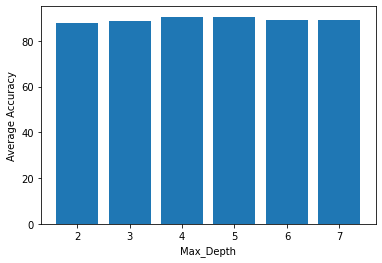

In [20]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(2,8)],max_accu_2)
plt.xlabel("Max_Depth")
plt.ylabel("Average Accuracy")
plt.show()

4) Implement XGBoost

In [21]:
from xgboost import XGBClassifier as XGBC 
xgb_model=XGBC(max_depth=4,subsample=0.7) 
xgb_model.fit(x_training, y_training.values.ravel())

XGBClassifier(max_depth=4, subsample=0.7)

5) Accuracy check on training and testing set

In [22]:
xgb_predict_train= xgb_model.predict( x_training )
print("Accuracy on training set is ",total_accuracy(list(xgb_predict_train),list(y_training['diagnosis'])))
xgb_predict_testing= xgb_model.predict( x_testing )
print("Accuracy on testing set is ",total_accuracy(list(xgb_predict_testing),list(y_testing['diagnosis'])))

Accuracy on training set is  99.06323185011709
Accuracy on testing set is  91.54929577464789


6) Implementing LightGBM

Accuracy with num_leaves equal to  2  is  91.54929577464789
Accuracy with num_leaves equal to  3  is  93.66197183098592
Accuracy with num_leaves equal to  4  is  92.95774647887323
Accuracy with num_leaves equal to  5  is  91.54929577464789
Accuracy with num_leaves equal to  6  is  92.95774647887323
Accuracy with num_leaves equal to  7  is  91.54929577464789
Accuracy with num_leaves equal to  8  is  92.95774647887323
Accuracy with num_leaves equal to  9  is  92.95774647887323


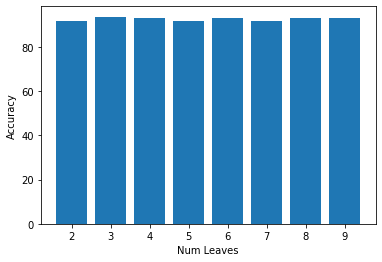

In [23]:
import lightgbm as lgb
accu_lg=[]
for leaves_num in range(2,10):
    lgb_model=lgb.LGBMClassifier(max_depth=3,num_leaves=leaves_num)
    lgb_model.fit(x_training,y_training.values.ravel())
    lgb_predict= lgb_model.predict(x_testing)
    accu_lg.append(total_accuracy(list(lgb_predict),list(y_testing['diagnosis'])))
    print("Accuracy with num_leaves equal to ",leaves_num," is ",total_accuracy(list(lgb_predict),list(y_testing['diagnosis'])))
plt.bar([i for i in range(2,10)],accu_lg)
plt.xlabel("Num Leaves")
plt.ylabel("Accuracy")
plt.show()

7) Analzing relation between max_depth and num_leaves

In [27]:
a=[]
diff_list=[]
for depth_max in range(2,8):
  diff=0
  leaf_no=0
  for leaves_num in range(2,2**depth_max):
    lgb_model=lgb.LGBMClassifier(max_depth=3,num_leaves=leaves_num)
    lgb_model.fit(x_training,y_training.values.ravel())
    lgb_predict= lgb_model.predict(x_testing)
    accu_test=total_accuracy(list(lgb_predict),list(y_testing['diagnosis']))
    lgb_predict_train= lgb_model.predict(x_training)
    accu_train=total_accuracy(list(lgb_predict_train),list(y_training['diagnosis']))
    if(accu_train-accu_test>diff):
      diff=accu_train-accu_test
      leaf_no=leaves_num
  diff_list.append(diff)
  a.append(leaf_no)

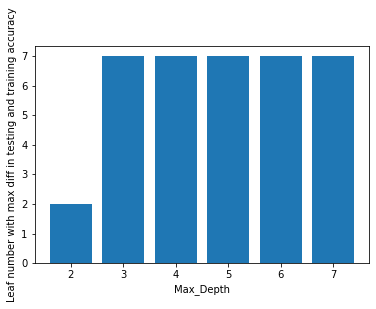

In [28]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(2,8)],a)
plt.xlabel("Max_Depth")
plt.ylabel("Leaf number with max diff in testing and training accuracy")
plt.show()

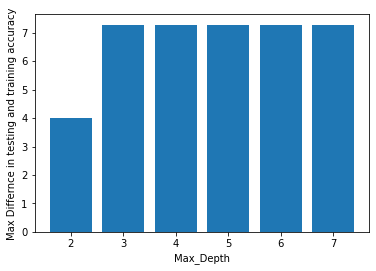

In [29]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(2,8)],diff_list)
plt.xlabel("Max_Depth")
plt.ylabel("Max Differnce in testing and training accuracy")
plt.show()